In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing
plt.rc("font", size=14)
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# 1. Import & Clean Data

In [28]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from imblearn.over_sampling import SMOTE 

In [29]:
data = pd.read_csv("general_data.csv",sep=",")

In [30]:
pd.set_option("display.max_columns", None)
data.head()

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating,JobInvolvement,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,No,51,Travel_Rarely,Sales,5,2,Life_Sciences,1,1,Female,1,Healthcare_Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,1,3,3.0,4.0,3.0
1,No,32,Travel_Frequently,Research_Development,14,4,Other,1,3,Male,4,Sales_Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,3,2,3.0,2.0,2.0
2,No,38,Non-Travel,Research_Development,2,5,Life_Sciences,1,4,Male,3,Human_Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,3,4,2.0,2.0,4.0
3,No,32,Travel_Rarely,Research_Development,8,1,Medical,1,5,Male,1,Sales_Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,1,3,4.0,4.0,3.0
4,No,46,Travel_Rarely,Research_Development,6,3,Life_Sciences,1,6,Female,4,Research_Director,Married,40710,3.0,Y,13,8,0,28.0,5,7,7,7,3,3,4.0,3.0,2.0


In [31]:
data.describe().round(1)

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating,JobInvolvement,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
count,4410.0,4410.0,4410.0,4410.0,4410.0,4410.0,4410.0,4391.0,4410.0,4410.0,4410.0,4401.0,4410.0,4410.0,4410.0,4410.0,4410.0,4410.0,4385.0,4390.0,4388.0
mean,36.9,8.0,2.9,1.0,2205.5,2.1,65029.3,2.7,14.4,8.0,0.8,11.3,2.8,7.0,2.2,4.1,3.0,3.0,2.9,3.1,3.0
std,9.1,7.1,1.0,0.0,1273.2,1.1,47068.9,2.5,4.2,0.0,0.9,7.8,1.3,6.1,3.2,3.6,0.6,0.9,1.1,0.9,0.9
min,18.0,1.0,1.0,1.0,1.0,1.0,10090.0,0.0,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
25%,30.0,2.0,2.0,1.0,1103.2,1.0,29110.0,1.0,12.0,8.0,0.0,6.0,2.0,3.0,0.0,2.0,3.0,2.0,2.0,2.0,2.0
50%,36.0,6.0,3.0,1.0,2205.5,2.0,49190.0,2.0,14.0,8.0,1.0,10.0,3.0,5.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0
75%,43.0,12.0,4.0,1.0,3307.8,3.0,83800.0,4.0,17.0,8.0,1.0,15.0,3.0,9.0,3.0,7.0,3.0,4.0,4.0,4.0,4.0
max,60.0,35.0,5.0,1.0,4410.0,5.0,199990.0,9.0,25.0,8.0,3.0,40.0,6.0,40.0,15.0,17.0,4.0,4.0,4.0,4.0,4.0


In [32]:
data.shape

(4410, 29)

In [33]:
data.isnull().sum()

Attrition                   0
Age                         0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
PerformanceRating           0
JobInvolvement              0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            22
dtype: int64

In [34]:
data['NumCompaniesWorked_Missing'] = np.where(data['NumCompaniesWorked'] >= 0, 1, 0)
data['TotalWorkingYears_Missing'] = np.where(data['TotalWorkingYears'] >= 0, 1, 0)
data['EnvironmentSatisfaction_Missing'] = np.where(data['EnvironmentSatisfaction'] >= 0, 1, 0)
data['JobSatisfaction_Missing'] = np.where(data['JobSatisfaction'] >= 0, 1, 0)
data['WorkLifeBalance_Missing'] = np.where(data['WorkLifeBalance'] >= 0, 1, 0)

In [35]:
data = data.fillna(data.mean())

In [36]:
data.isnull().any()

Attrition                          False
Age                                False
BusinessTravel                     False
Department                         False
DistanceFromHome                   False
Education                          False
EducationField                     False
EmployeeCount                      False
EmployeeID                         False
Gender                             False
JobLevel                           False
JobRole                            False
MaritalStatus                      False
MonthlyIncome                      False
NumCompaniesWorked                 False
Over18                             False
PercentSalaryHike                  False
StandardHours                      False
StockOptionLevel                   False
TotalWorkingYears                  False
TrainingTimesLastYear              False
YearsAtCompany                     False
YearsSinceLastPromotion            False
YearsWithCurrManager               False
PerformanceRatin

In [37]:
data.head()

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating,JobInvolvement,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,NumCompaniesWorked_Missing,TotalWorkingYears_Missing,EnvironmentSatisfaction_Missing,JobSatisfaction_Missing,WorkLifeBalance_Missing
0,No,51,Travel_Rarely,Sales,5,2,Life_Sciences,1,1,Female,1,Healthcare_Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,1,3,3.0,4.0,3.0,1,1,1,1,1
1,No,32,Travel_Frequently,Research_Development,14,4,Other,1,3,Male,4,Sales_Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,3,2,3.0,2.0,2.0,1,1,1,1,1
2,No,38,Non-Travel,Research_Development,2,5,Life_Sciences,1,4,Male,3,Human_Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,3,4,2.0,2.0,4.0,1,1,1,1,1
3,No,32,Travel_Rarely,Research_Development,8,1,Medical,1,5,Male,1,Sales_Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,1,3,4.0,4.0,3.0,1,1,1,1,1
4,No,46,Travel_Rarely,Research_Development,6,3,Life_Sciences,1,6,Female,4,Research_Director,Married,40710,3.0,Y,13,8,0,28.0,5,7,7,7,3,3,4.0,3.0,2.0,1,1,1,1,1


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Attrition                        4410 non-null   object 
 1   Age                              4410 non-null   int64  
 2   BusinessTravel                   4410 non-null   object 
 3   Department                       4410 non-null   object 
 4   DistanceFromHome                 4410 non-null   int64  
 5   Education                        4410 non-null   int64  
 6   EducationField                   4410 non-null   object 
 7   EmployeeCount                    4410 non-null   int64  
 8   EmployeeID                       4410 non-null   int64  
 9   Gender                           4410 non-null   object 
 10  JobLevel                         4410 non-null   int64  
 11  JobRole                          4410 non-null   object 
 12  MaritalStatus       

# 2. Explore

In [39]:
data.drop(['EmployeeCount', 'EmployeeID', 'StandardHours', 'Over18'], axis=1, inplace=True)

In [40]:
data.head()

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating,JobInvolvement,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,NumCompaniesWorked_Missing,TotalWorkingYears_Missing,EnvironmentSatisfaction_Missing,JobSatisfaction_Missing,WorkLifeBalance_Missing
0,No,51,Travel_Rarely,Sales,5,2,Life_Sciences,Female,1,Healthcare_Representative,Married,131160,1.0,11,0,1.0,6,1,0,0,1,3,3.0,4.0,3.0,1,1,1,1,1
1,No,32,Travel_Frequently,Research_Development,14,4,Other,Male,4,Sales_Executive,Married,193280,1.0,15,3,5.0,2,5,0,3,3,2,3.0,2.0,2.0,1,1,1,1,1
2,No,38,Non-Travel,Research_Development,2,5,Life_Sciences,Male,3,Human_Resources,Married,83210,3.0,11,3,13.0,5,8,7,5,3,4,2.0,2.0,4.0,1,1,1,1,1
3,No,32,Travel_Rarely,Research_Development,8,1,Medical,Male,1,Sales_Executive,Single,23420,4.0,12,2,9.0,2,6,0,4,1,3,4.0,4.0,3.0,1,1,1,1,1
4,No,46,Travel_Rarely,Research_Development,6,3,Life_Sciences,Female,4,Research_Director,Married,40710,3.0,13,0,28.0,5,7,7,7,3,3,4.0,3.0,2.0,1,1,1,1,1


In [41]:
data.dtypes

Attrition                           object
Age                                  int64
BusinessTravel                      object
Department                          object
DistanceFromHome                     int64
Education                            int64
EducationField                      object
Gender                              object
JobLevel                             int64
JobRole                             object
MaritalStatus                       object
MonthlyIncome                        int64
NumCompaniesWorked                 float64
PercentSalaryHike                    int64
StockOptionLevel                     int64
TotalWorkingYears                  float64
TrainingTimesLastYear                int64
YearsAtCompany                       int64
YearsSinceLastPromotion              int64
YearsWithCurrManager                 int64
PerformanceRating                    int64
JobInvolvement                       int64
EnvironmentSatisfaction            float64
JobSatisfac

#### assign numerical encoding to categorical yes/no var, dependent var becomes either 0 or 1


In [42]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Attrition'] = label_encoder.fit_transform(data['Attrition'])

In [43]:
data.head()

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating,JobInvolvement,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,NumCompaniesWorked_Missing,TotalWorkingYears_Missing,EnvironmentSatisfaction_Missing,JobSatisfaction_Missing,WorkLifeBalance_Missing
0,0,51,Travel_Rarely,Sales,5,2,Life_Sciences,Female,1,Healthcare_Representative,Married,131160,1.0,11,0,1.0,6,1,0,0,1,3,3.0,4.0,3.0,1,1,1,1,1
1,0,32,Travel_Frequently,Research_Development,14,4,Other,Male,4,Sales_Executive,Married,193280,1.0,15,3,5.0,2,5,0,3,3,2,3.0,2.0,2.0,1,1,1,1,1
2,0,38,Non-Travel,Research_Development,2,5,Life_Sciences,Male,3,Human_Resources,Married,83210,3.0,11,3,13.0,5,8,7,5,3,4,2.0,2.0,4.0,1,1,1,1,1
3,0,32,Travel_Rarely,Research_Development,8,1,Medical,Male,1,Sales_Executive,Single,23420,4.0,12,2,9.0,2,6,0,4,1,3,4.0,4.0,3.0,1,1,1,1,1
4,0,46,Travel_Rarely,Research_Development,6,3,Life_Sciences,Female,4,Research_Director,Married,40710,3.0,13,0,28.0,5,7,7,7,3,3,4.0,3.0,2.0,1,1,1,1,1


In [44]:
data.describe().round(1)

,Attrition,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating,JobInvolvement,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,NumCompaniesWorked_Missing,TotalWorkingYears_Missing,EnvironmentSatisfaction_Missing,JobSatisfaction_Missing,WorkLifeBalance_Missing
count,4410.0,4410.0,4410.0,4410.0,4410.0,4410.0,4410.0,4410.0,4410.0,4410.0,4410.0,4410.0,4410.0,4410.0,4410.0,4410.0,4410.0,4410.0,4410.0,4410.0,4410.0,4410.0,4410.0,4410.0
mean,0.2,36.9,8.0,2.9,2.1,65029.3,2.7,14.4,0.8,11.3,2.8,7.0,2.2,4.1,3.0,3.0,2.9,3.1,3.0,1.0,1.0,1.0,1.0,1.0
std,0.4,9.1,7.1,1.0,1.1,47068.9,2.5,4.2,0.9,7.8,1.3,6.1,3.2,3.6,0.6,0.9,1.1,0.9,0.9,0.1,0.0,0.1,0.1,0.1
min,0.0,18.0,1.0,1.0,1.0,10090.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,30.0,2.0,2.0,1.0,29110.0,1.0,12.0,0.0,6.0,2.0,3.0,0.0,2.0,3.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0
50%,0.0,36.0,6.0,3.0,2.0,49190.0,2.0,14.0,1.0,10.0,3.0,5.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0
75%,0.0,43.0,12.0,4.0,3.0,83800.0,4.0,17.0,1.0,15.0,3.0,9.0,3.0,7.0,3.0,4.0,4.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0
max,1.0,60.0,35.0,5.0,5.0,199990.0,9.0,25.0,3.0,40.0,6.0,40.0,15.0,17.0,4.0,4.0,4.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0


#### Make a list of variables for correlation

In [45]:
corr_cols = data[['Age','Attrition','BusinessTravel','DistanceFromHome','Education', 'EducationField','Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'EnvironmentSatisfaction','JobSatisfaction','WorkLifeBalance' ]]

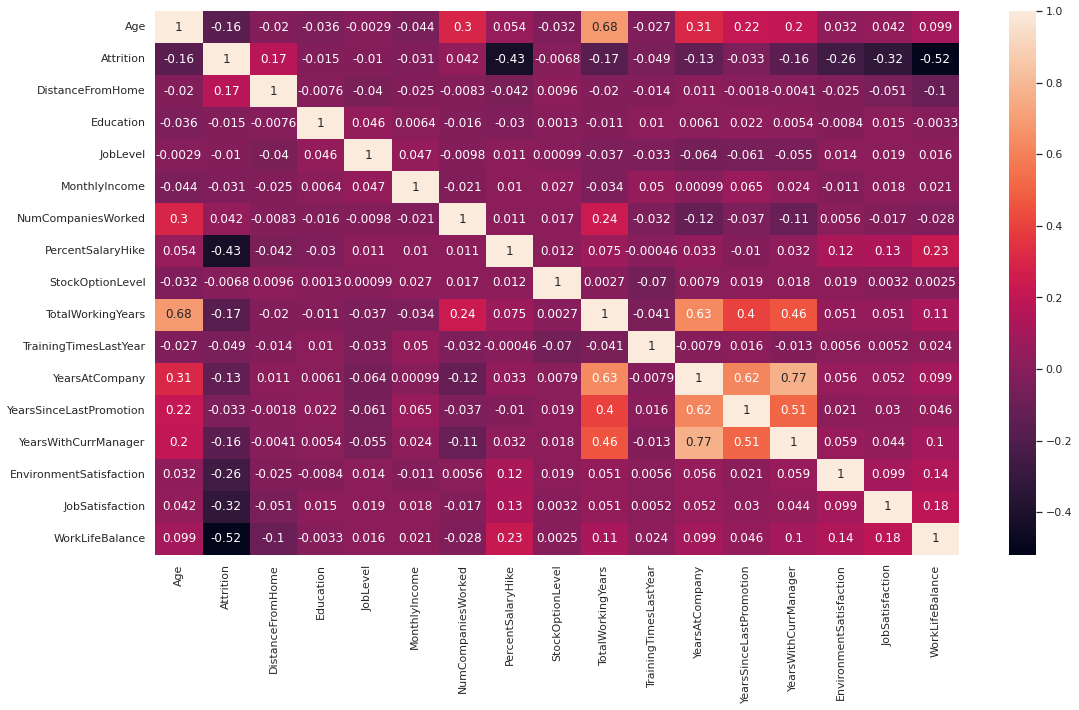

In [46]:
corr = corr_cols.corr()
plt.figure(figsize=(18, 10))
sns.heatmap(corr, annot=True)
plt.show()

In [47]:
data.describe().round(1)

,Attrition,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating,JobInvolvement,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,NumCompaniesWorked_Missing,TotalWorkingYears_Missing,EnvironmentSatisfaction_Missing,JobSatisfaction_Missing,WorkLifeBalance_Missing
count,4410.0,4410.0,4410.0,4410.0,4410.0,4410.0,4410.0,4410.0,4410.0,4410.0,4410.0,4410.0,4410.0,4410.0,4410.0,4410.0,4410.0,4410.0,4410.0,4410.0,4410.0,4410.0,4410.0,4410.0
mean,0.2,36.9,8.0,2.9,2.1,65029.3,2.7,14.4,0.8,11.3,2.8,7.0,2.2,4.1,3.0,3.0,2.9,3.1,3.0,1.0,1.0,1.0,1.0,1.0
std,0.4,9.1,7.1,1.0,1.1,47068.9,2.5,4.2,0.9,7.8,1.3,6.1,3.2,3.6,0.6,0.9,1.1,0.9,0.9,0.1,0.0,0.1,0.1,0.1
min,0.0,18.0,1.0,1.0,1.0,10090.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,30.0,2.0,2.0,1.0,29110.0,1.0,12.0,0.0,6.0,2.0,3.0,0.0,2.0,3.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0
50%,0.0,36.0,6.0,3.0,2.0,49190.0,2.0,14.0,1.0,10.0,3.0,5.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0
75%,0.0,43.0,12.0,4.0,3.0,83800.0,4.0,17.0,1.0,15.0,3.0,9.0,3.0,7.0,3.0,4.0,4.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0
max,1.0,60.0,35.0,5.0,5.0,199990.0,9.0,25.0,3.0,40.0,6.0,40.0,15.0,17.0,4.0,4.0,4.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0


<AxesSubplot:xlabel='Attrition', ylabel='count'>

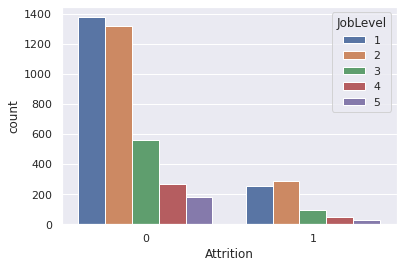

In [48]:
sns.countplot(x='Attrition', data=data, hue='JobLevel')

In [49]:
data['JobLevel_Bin'] = pd.cut(data['JobLevel'],\
                             bins=[1, 2, 3, 4, 5],\
                             labels=[1, 2, 3, 4])

<AxesSubplot:xlabel='Attrition', ylabel='count'>

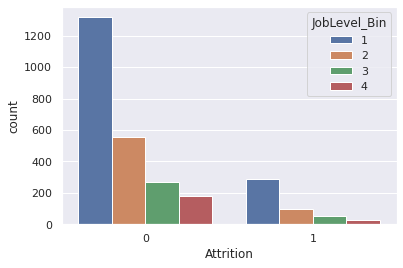

In [50]:
sns.countplot(x='Attrition', data=data, hue='JobLevel_Bin')

In [51]:
categorical_cols = data.select_dtypes(include='object').columns.tolist()

In [52]:
categorical_cols

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus']

#### convert categorical vars into separate dummy vars, e.g. Gender == Gender_Male w/value of 0 or 1...0 is not male, 1 is male

In [53]:
df = \
pd.get_dummies(data, \
               columns=['Gender', 'JobRole', \
                        'BusinessTravel','Education',\
                        'EducationField','JobLevel',\
                        'MaritalStatus','Department',\
                        'StockOptionLevel'], drop_first=True)

In [54]:
df.head()

,Attrition,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating,JobInvolvement,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,NumCompaniesWorked_Missing,TotalWorkingYears_Missing,EnvironmentSatisfaction_Missing,JobSatisfaction_Missing,WorkLifeBalance_Missing,JobLevel_Bin,Gender_Male,JobRole_Human_Resources,JobRole_Laboratory _Technician,JobRole_Manager,JobRole_Manufacturing_Director,JobRole_Research_Director,JobRole_Research_Scientist,JobRole_Sales_Executive,JobRole_Sales_Representative,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Education_2,Education_3,Education_4,Education_5,EducationField_Life_Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical_Degree,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,MaritalStatus_Married,MaritalStatus_Single,Department_Research_Development,Department_Sales,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3
0,0,51,5,131160,1.0,11,1.0,6,1,0,0,1,3,3.0,4.0,3.0,1,1,1,1,1,NaN,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1,0,32,14,193280,1.0,15,5.0,2,5,0,3,3,2,3.0,2.0,2.0,1,1,1,1,1,3,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1
2,0,38,2,83210,3.0,11,13.0,5,8,7,5,3,4,2.0,2.0,4.0,1,1,1,1,1,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1
3,0,32,8,23420,4.0,12,9.0,2,6,0,4,1,3,4.0,4.0,3.0,1,1,1,1,1,NaN,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0
4,0,46,6,40710,3.0,13,28.0,5,7,7,7,3,3,4.0,3.0,2.0,1,1,1,1,1,3,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0


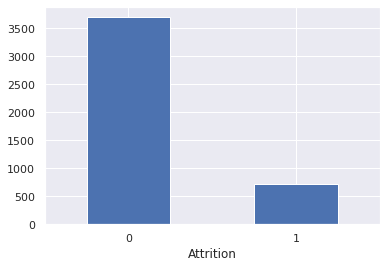

In [55]:
data.pivot_table(index='Attrition', aggfunc='size').plot(kind='bar').tick_params(labelrotation=0)

<AxesSubplot:xlabel='Attrition', ylabel='count'>

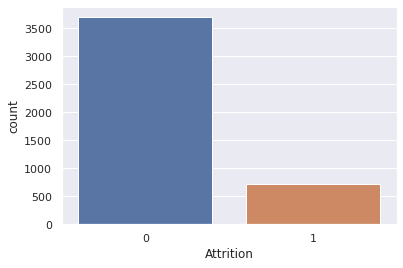

In [56]:
sns.countplot(x = "Attrition",data=data)

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
train, test = train_test_split(df, test_size = 0.3, stratify=data['Attrition'])

In [59]:
train.head()

,Attrition,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating,JobInvolvement,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,NumCompaniesWorked_Missing,TotalWorkingYears_Missing,EnvironmentSatisfaction_Missing,JobSatisfaction_Missing,WorkLifeBalance_Missing,JobLevel_Bin,Gender_Male,JobRole_Human_Resources,JobRole_Laboratory _Technician,JobRole_Manager,JobRole_Manufacturing_Director,JobRole_Research_Director,JobRole_Research_Scientist,JobRole_Sales_Executive,JobRole_Sales_Representative,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Education_2,Education_3,Education_4,Education_5,EducationField_Life_Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical_Degree,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,MaritalStatus_Married,MaritalStatus_Single,Department_Research_Development,Department_Sales,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3
2291,0,33,23,31800,1.0,14,15.000000,2,15,8,12,3,4,3.0,3.0,3.0,1,1,1,1,1,NaN,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
20,0,42,3,89260,1.0,14,11.279936,4,20,11,6,3,3,3.0,2.0,3.0,1,0,1,1,1,NaN,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
409,0,41,15,58280,1.0,13,21.000000,0,21,5,10,3,4,3.0,4.0,4.0,1,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1140,0,40,21,54400,1.0,12,20.000000,2,20,2,13,3,4,4.0,4.0,4.0,1,1,1,1,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0
2365,0,38,6,50420,3.0,16,19.000000,4,3,2,2,3,2,2.0,3.0,3.0,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0


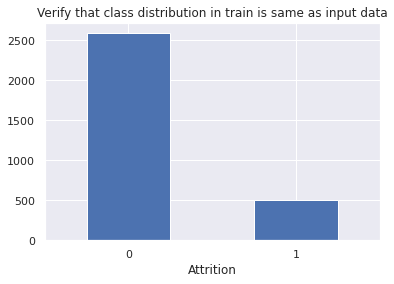

In [60]:
train.pivot_table(index='Attrition', aggfunc='size').plot(kind='bar', title='Verify that class distribution in train is same as input data').tick_params(labelrotation=0)


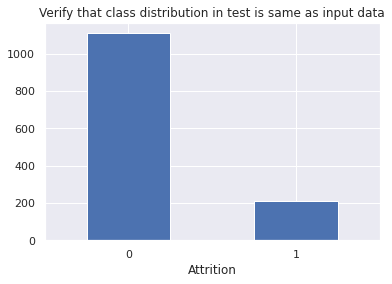

In [61]:
test.pivot_table(index='Attrition', aggfunc='size').plot(kind='bar', title='Verify that class distribution in test is same as input data').tick_params(labelrotation=0)


In [62]:
independent_vars = ['Age','DistanceFromHome','Education', 'EducationField','Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'EnvironmentSatisfaction','JobSatisfaction','WorkLifeBalance' ]

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
train = train.drop(['JobLevel_Bin'], axis=1)

In [65]:
my_log_reg = LogisticRegression()
train_y = train['Attrition']
train_X = train.drop(['Attrition'], axis = 1)
my_log_reg.fit(train_X, train_y)

LogisticRegression()

#### pull out coefficients from model fit, as well as convert log odds to odds by exponentation 

In [66]:
my_log_odds = my_log_reg.coef_[0]
coef_odds = \
pd.DataFrame(my_log_odds, train_X.columns, columns=['coef']).sort_values(by='coef', ascending=False).reset_index().rename(columns={'index': 'VAR', 'coef': 'estimate'})
odds = np.exp(my_log_odds)
coef_odds_ratios = \
pd.DataFrame(odds, train_X.columns, columns=['coef']).sort_values(by='coef', ascending=False).reset_index().rename(columns={'index': 'VAR', 'coef': 'estimate'})
# coef_odds_ratios

In [67]:
coef_odds

,VAR,estimate
0,DistanceFromHome,0.079471
1,Age,0.058344
2,NumCompaniesWorked,0.041984
3,YearsSinceLastPromotion,0.030824
4,MaritalStatus_Single,0.018503
5,BusinessTravel_Travel_Frequently,0.010783
6,Education_2,0.005740
7,Gender_Male,0.005593
8,JobLevel_2,0.005312
9,NumCompaniesWorked_Missing,0.004599


#### see a 8.2% increase in odds of attrition for each 1 point increase in distance from home...on the flipside, see a 24% decrease in odds of attrition for each 1 point increase in percent salary hike

In [88]:
coef_odds_ratios

,VAR,estimate
0,DistanceFromHome,1.082714
1,Age,1.060080
2,NumCompaniesWorked,1.042878
3,YearsSinceLastPromotion,1.031304
4,MaritalStatus_Single,1.018676
5,BusinessTravel_Travel_Frequently,1.010842
6,Education_2,1.005756
7,Gender_Male,1.005609
8,JobLevel_2,1.005326
9,NumCompaniesWorked_Missing,1.004610


In [69]:
test = test.drop(['JobLevel_Bin'], axis=1)

In [70]:
test_X = test.drop(['Attrition'], axis=1)
preds = my_log_reg.predict(test_X)

In [71]:
len(preds)

1323

In [74]:
from sklearn.metrics \
import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve, ConfusionMatrixDisplay

In [75]:
tn, fp, fn, tp = confusion_matrix(test['Attrition'], preds).ravel()

In [76]:
tn, fp, fn, tp

(1102, 8, 149, 64)

In [77]:
print(classification_report(test['Attrition'], preds))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1110
           1       0.89      0.30      0.45       213

    accuracy                           0.88      1323
   macro avg       0.88      0.65      0.69      1323
weighted avg       0.88      0.88      0.86      1323



In [78]:
from imblearn.over_sampling import SMOTE 

In [79]:
X_resampled, y_resampled = \
SMOTE(random_state=42).fit_resample(train_X, train_y)

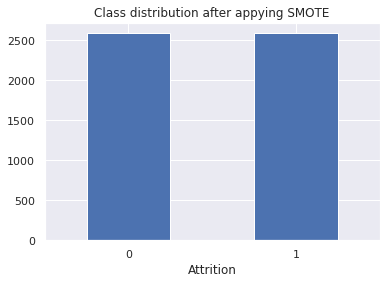

In [80]:
y_resampled.value_counts().\
plot(kind='bar', \
     title='Class distribution after appying SMOTE', \
     xlabel='Attrition').tick_params(labelrotation=0)

In [81]:
print(f'''Shape of X before SMOTE: {train_X.shape}
Shape of X after SMOTE: {X_resampled.shape}''')

Shape of X before SMOTE: (3087, 51)
Shape of X after SMOTE: (5178, 51)


In [82]:
my_log_reg2 = LogisticRegression()

In [83]:
my_log_reg2.fit(X_resampled, y_resampled)
preds_2 = my_log_reg2.predict(test_X)

In [84]:
my_log_odds_2 = my_log_reg2.coef_[0]
pd.DataFrame(my_log_odds, X_resampled.columns, columns=['coef']).sort_values(by='coef', ascending=False)
odds_2 = np.exp(my_log_odds_2)
coef_odds_ratios_2 = \
pd.DataFrame(odds_2, X_resampled.columns, columns=['coef']).sort_values(by='coef', ascending=False).reset_index().rename(columns={'index': 'VAR', 'coef': 'estimate'})
coef_odds_ratios_2

,VAR,estimate
0,DistanceFromHome,1.102340
1,Age,1.092444
2,NumCompaniesWorked,1.043289
3,YearsSinceLastPromotion,1.027522
4,MaritalStatus_Single,1.012522
5,NumCompaniesWorked_Missing,1.011210
6,EnvironmentSatisfaction_Missing,1.010977
7,TotalWorkingYears_Missing,1.010691
8,JobSatisfaction_Missing,1.008524
9,WorkLifeBalance_Missing,1.006734


In [85]:
tn, fp, fn, tp = confusion_matrix(test['Attrition'], preds_2).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue positives: ', tp)

True negatives:  935 
False positives:  175 
False negatives:  78 
True positives:  135


In [86]:
print(classification_report(test['Attrition'], preds_2))


              precision    recall  f1-score   support

           0       0.92      0.84      0.88      1110
           1       0.44      0.63      0.52       213

    accuracy                           0.81      1323
   macro avg       0.68      0.74      0.70      1323
weighted avg       0.84      0.81      0.82      1323



In [87]:
print(classification_report(test['Attrition'], preds))


              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1110
           1       0.89      0.30      0.45       213

    accuracy                           0.88      1323
   macro avg       0.88      0.65      0.69      1323
weighted avg       0.88      0.88      0.86      1323

